In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
X_train_full = X_train_full/255.0
X_test = X_test/255.0

X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_train = X_train.reshape(-1, 28 * 28)
X_valid = X_valid.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)

In [5]:
#Helper funtion to build the model
'''
Initializers aren't used in chapter 10, but using them here just to 
provide an idea about using them in the future. I will be discussing 
initializers in chapter 11 in detail. :)
'''

def build_model(n_hidden=1, n_neurons=30, learning_rate=0.01, 
                input_shape=[28*28], activation='relu', initializer='he_normal'):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))

    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation=activation, kernel_initializer=initializer))

    model.add(keras.layers.Dense(10, activation='softmax'))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [6]:
#TUNING ROUND 1
#Number of Hidden Layers and Neurons

configs = [
    (1, 30),
    (1, 300),
    (2, 30),
    (2, 300)
]

histories = {}

for n_hidden, n_neurons in configs:
    name = f"{n_hidden}x{n_neurons}"
    print(f"Training {name}")
    model = build_model(n_hidden=n_hidden, n_neurons=n_neurons)
    history = model.fit(X_train, y_train, epochs=10,
        validation_data=(X_valid, y_valid), verbose=0)
    histories[name] = history

Training 1x30


/home/onlyahad/miniconda3/envs/ml_global/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
E0000 00:00:1752600877.607745   13903 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1752600877.612141   13903 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Training 1x300
Training 2x30
Training 2x300


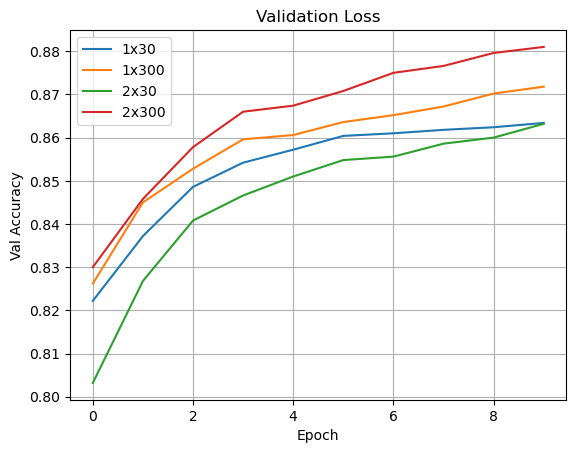

In [8]:
#Plotting the results from Round 1

for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Val Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
#TUNING ROUND 2
#Learning Rate

rates = [0.01, 0.1]
histories = {}

for lr in rates:
    name = f"lr={lr}"
    print(f"Training {name}")
    model = build_model(learning_rate=lr)
    history = model.fit(X_train, y_train, epochs=7,
        validation_data=(X_valid, y_valid), verbose=0)
    histories[name] = history

Training lr=0.01


/home/onlyahad/miniconda3/envs/ml_global/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training lr=0.1


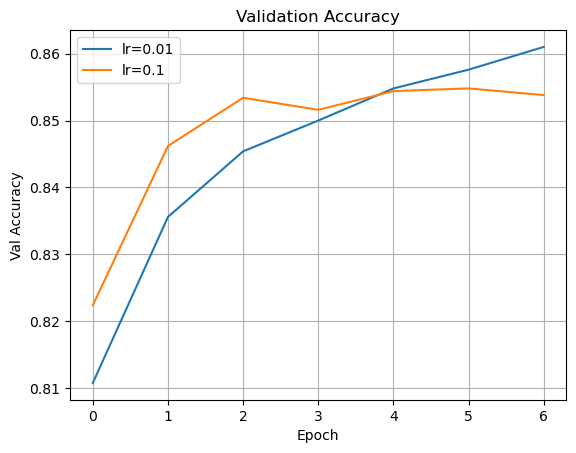

In [10]:
for name, history in histories.items():
    plt.plot(history.history["val_accuracy"], label=name)

plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [11]:
#TUNING ROUND 3
#Batch Size

batch_sizes = [32, 128]
histories = {}

for b in batch_sizes:
    name = f"batch_size={b}"
    print(f"Training {name}")
    model = build_model()
    history = model.fit(X_train, y_train, epochs=10,
        validation_data=(X_valid, y_valid), verbose=0, batch_size=b)
    histories[name] = history

Training batch_size=32


/home/onlyahad/miniconda3/envs/ml_global/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training batch_size=128


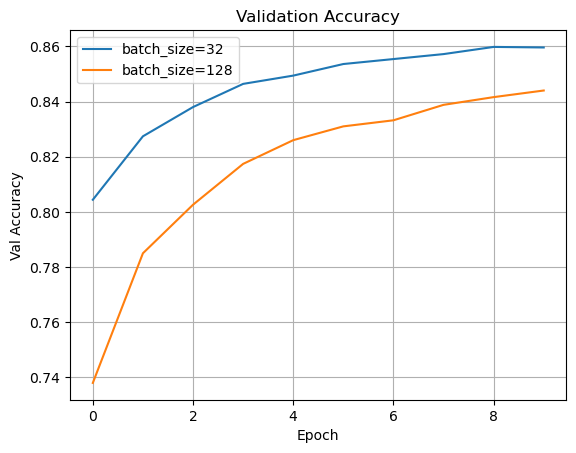

In [12]:
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
#TUNING ROUND 4
#Activation Function

acts = ["relu", "tanh"]
histories = {}

for act in acts:
    name = f"act={act}"
    print(f"Training {name}")
    model = build_model(activation=act)
    history = model.fit(X_train, y_train, epochs=10, 
        validation_data=(X_valid, y_valid), verbose=0)
    histories[name] = history

Training act=relu


/home/onlyahad/miniconda3/envs/ml_global/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training act=tanh


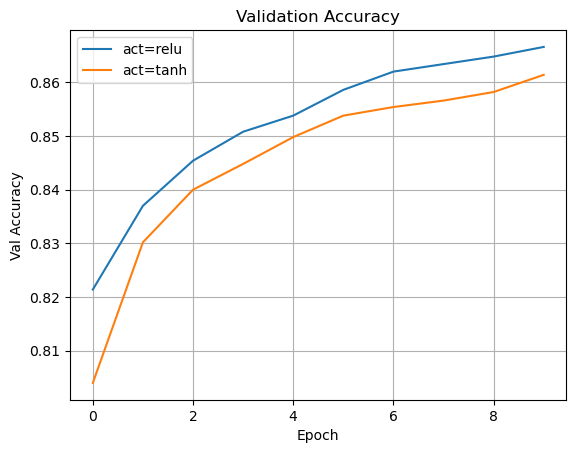

In [15]:
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
inits = ['he_normal', 'glorot_uniform']
histories = {}

for init in inits:
    name = f"init={init}"
    print(f"Training {name}")
    model = build_model(initializer=init)
    history = model.fit(X_train, y_train, epochs=10,
        validation_data=(X_valid, y_valid), verbose=0)
    histories[name] = history

Training init=he_normal


/home/onlyahad/miniconda3/envs/ml_global/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Training init=glorot_uniform


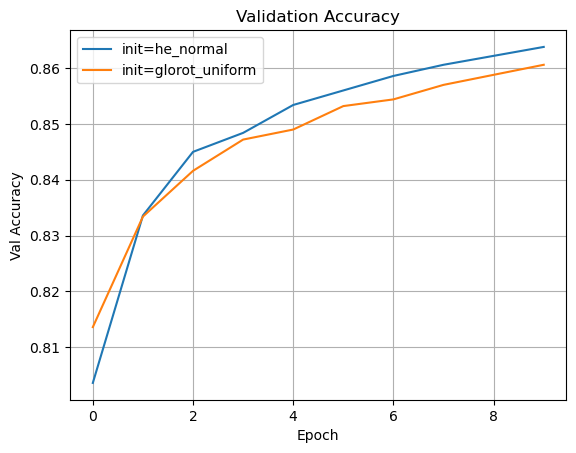

In [17]:
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)

plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Val Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# COMPLETED THE CHAPTER :) :)